In [8]:
from rac.experiment_data import ExperimentReader
er = ExperimentReader(metrics=["rand"])
start_index = 1

config = {
    "_experiment_name": "test_al2",
    "_num_repeats": 10,
    "_n_workers": 10,
    "_local": True,
    "_verbose": True,
    "_overwrite": False,
    "_mode": "al",

    "seed": [14, 15, 16, 17],
    "batch_size": [5],
    "noise_level": [0.0, 0.2],
    "warm_start": [0.05],
    "acq_fn": ["uniform", "entropy", "cc_entropy"],
    "model_name": "MLP",
    "predictor": ["model", "CC"],
    "dynamic_K": [False],
    "sample_size": 1,
    "test_sample_size": 1,
    "oracle": ["hard", "soft"],
    "sim_noise_level": [0.0],
    "n_passes": [3],
    "scaling_factor": [1, 3],

    "acq_noise": [False, True],
    "power_beta": [1],
    "use_power": [True],
    "mean_field_beta": [5],
    "allow_requery": [False, True],

    "dataset_name": "synthetic",
    "dataset_n_samples": 700,
    "dataset_n_clusters": 6,
    "dataset_class_balance": None,
    "dataset_class_sep": [1, 1.5],
    "dataset_n_features": [10],
    "dataset_y_flip": [0],
}


start_index = er.generate_experiments(
    folder="../configs/test_al2",
    options_to_keep=[],
    start_index=start_index, 
    **config
)

In [9]:
import numpy as np
np.argsort(-np.array([1,5,7,-3,4]))

array([2, 1, 4, 0, 3], dtype=int64)

In [1]:
from rac.experiment_data import ExperimentReader
er = ExperimentReader(metrics=["train_accuracy", "pool_accuracy", "accuracy"])
data = er.read_all_data(folder="../experiment_results_local/test_al2/")

In [23]:
from rac.experiment_data import ExperimentReader
er = ExperimentReader(metrics=["train_accuracy", "pool_accuracy"])
data = er.read_all_data(folder="../experiment_results_local/test_al2/")
print(data.shape)
print(data.keys())
config = {

    "seed": 14,
    "batch_size": [200],
    "noise_level": [0.2],
    "warm_start": [0.05],
    "acq_fn": ["entropy"],
    "model_name": "MLP",
    "predictor": ["model", "CC"],
    "dynamic_K": [True, False],
    "sim_init": ["t1", "t2", "t3"],
    "sim_init_qs": ["t1", "t2"],
    "sample_size": 1,
    "test_sample_size": 1,

    "acq_noise": [False, True],
    "power_beta": [1],
    "use_power": [True],
    "mean_field_beta": [1, 3, 20],
    "allow_requery": [True, False],

    "dataset_name": "synthetic",
    "dataset_n_samples": 2000,
    "dataset_n_clusters": 10,
    "dataset_class_balance": None,
    "dataset_class_sep": 1,
}
data = er.filter_dataframe(data, config).reset_index()
print(data.keys())
print(data.shape)

(1569, 24)
Index(['seed', 'batch_size', 'noise_level', 'warm_start', 'acq_fn',
       'model_name', 'predictor', 'dynamic_K', 'sim_init', 'sim_init_qs',
       'sample_size', 'test_sample_size', 'acq_noise', 'power_beta',
       'use_power', 'mean_field_beta', 'allow_requery', 'dataset_name',
       'dataset_n_samples', 'dataset_n_clusters', 'dataset_class_balance',
       'dataset_class_sep', 'train_accuracy', 'pool_accuracy'],
      dtype='object')
Index(['index', 'seed', 'batch_size', 'noise_level', 'warm_start', 'acq_fn',
       'model_name', 'predictor', 'dynamic_K', 'sim_init', 'sim_init_qs',
       'sample_size', 'test_sample_size', 'acq_noise', 'power_beta',
       'use_power', 'mean_field_beta', 'allow_requery', 'dataset_name',
       'dataset_n_samples', 'dataset_n_clusters', 'dataset_class_balance',
       'dataset_class_sep', 'train_accuracy', 'pool_accuracy'],
      dtype='object')
(188, 25)


In [4]:
import numpy as np
np.argsort([1,2,3,0])

array([3, 0, 1, 2], dtype=int64)

In [ ]:
seps = [0.5, 1, 1.5],
feats = [4, 10],
noises = [0.0, 0.2, 0.4]
npasses = [1, 3]
acq_noises = [False, True]
allow_res = [False, True]
oracles = ["hard", "soft"]


for sep in seps:
    for feat in feats:
        for noise in noises:
            for npass in npasses:
                for acq_noise in acq_noises:
                    for allow_re in allow_res:
                        for oracle in oracles:
                            print("hi")
                            config = {
                                "seed": 14,
                                "batch_size": [5],
                                "noise_level": noise,
                                "warm_start": [0.025],
                                "acq_fn": ["uniform", "entropy", "cc_entropy"],
                                "model_name": "MLP",
                                "predictor": ["model", "CC"],
                                "dynamic_K": [False],
                                "sample_size": 1,
                                "test_sample_size": 1,
                                "oracle": oracle,
                                "sim_noise_level": [0.0],
                                "n_passes": npass,
                                "scaling_factor": [1],

                                "acq_noise": acq_noise,
                                "power_beta": [1],
                                "use_power": [True],
                                "mean_field_beta": [5],
                                "allow_requery": allow_re,

                                "dataset_name": "synthetic",
                                "dataset_n_samples": 500,
                                "dataset_n_clusters": 6,
                                "dataset_class_balance": None,
                                "dataset_class_sep": sep,
                                "dataset_n_features": feat,
                                "dataset_y_flip": [0],
                            }

                            new_data = er.filter_dataframe(data, config).reset_index()

                            er.generate_AL_curves(
                                new_data,
                                save_location="../plots/test_al9/",
                                categorize=[],
                                compare=["acq_fn", "predictor"],
                                vary=["x"],
                                options_in_file_name=["noise_level", "oracle", "n_passes", "acq_noise", "allow_requery", "dataset_class_sep", "dataset_n_features"],
                                auc=True,
                                summary_method="auc_max_ind",
                                indices=[], 
                                threshold=1,
                                err_style="band",
                                marker="o",
                                markersize=6,
                                capsize=6,
                                linestyle="solid",
                                prop=True,
                                **config
                            )

In [13]:
import numpy as np
A= np.random.rand(5,5)
A

array([[0.75139228, 0.66379196, 0.43834732, 0.55300025, 0.78623527],
       [0.70857655, 0.17479404, 0.96899124, 0.23834045, 0.93570656],
       [0.73852434, 0.74204518, 0.49882244, 0.53214798, 0.49285777],
       [0.25771077, 0.24745211, 0.65115739, 0.06242736, 0.56326061],
       [0.94657623, 0.17975766, 0.46739037, 0.4039192 , 0.19809709]])

In [21]:
-np.sort(-A)

array([[0.78623527, 0.75139228, 0.66379196, 0.55300025, 0.43834732],
       [0.96899124, 0.93570656, 0.70857655, 0.23834045, 0.17479404],
       [0.74204518, 0.73852434, 0.53214798, 0.49882244, 0.49285777],
       [0.65115739, 0.56326061, 0.25771077, 0.24745211, 0.06242736],
       [0.94657623, 0.46739037, 0.4039192 , 0.19809709, 0.17975766]])

In [1]:
import numpy as np
from rac.correlation_clustering import max_correlation, fast_max_correlation, max_correlation_dynamic_K, mean_field_clustering
from collections import Counter
from collections import defaultdict

def cc_pred(model, X, Y, n_train, use_model=False, use_dropout=False):
    Y_train = np.copy(Y)
    S = np.zeros((len(Y), len(Y)))
    if use_model:
        if use_dropout:
            prob_all = model.predict_proba_dropout(X)
        else:
            prob_all = model.predict_proba(X)
        #Y = np.argmax(prob_all, axis=1)

    # Initialize similarity matrix
    N = len(Y)
    for i in range(N):
        for j in range(0, i):
            if not use_model:
                S[i, j] = 1 if Y[i] == Y[j] else -1
                S[j, i] = S[i, j]
            else:
                #S[i, j] = 1 if Y[i] == Y[j] else -1
                #S[j, i] = S[i, j]
                P_S_ij_plus_1 = np.sum(prob_all[i, :] * prob_all[j, :])
                E_S_ij_plus_1 = P_S_ij_plus_1
                E_S_ij_minus_1 = E_S_ij_plus_1 - 1
                E_S_ij = P_S_ij_plus_1 * E_S_ij_plus_1 + (1 - P_S_ij_plus_1) * E_S_ij_minus_1
                S[i, j] = E_S_ij
                S[j, i] = S[i, j]
            #if np.random.rand() < 0.5:
            #    S[i, j] = np.random.uniform(-0.001, 0.001)
            #    S[j, i] = S[i, j]
                #S[i, j] = -S[i, j]
                #S[j, i] = S[i, j]

    # Ensure diagonal is zero
    np.fill_diagonal(S, 0)

    n_classes = len(np.unique(Y))
    clustering_solution, _ = max_correlation(S, n_classes, 3)
    #clustering_solution, q, h = mean_field_clustering(
    #            S=S, K=n_classes, betas=[3], max_iter=150, tol=1e-10, 
    #            predicted_labels=clustering_solution
    #        )

    predicted_labels = np.zeros(len(Y), dtype=np.int32)

    cluster_labels = {}
    for cluster in np.unique(clustering_solution):
        indices_in_cluster = np.where(clustering_solution == cluster)[0]
        indices_in_cluster = indices_in_cluster[indices_in_cluster < n_train]
        
        labels_in_cluster = []
        if indices_in_cluster.size > 0:
            labels_in_cluster = Y[indices_in_cluster]
            most_common_label, _ = Counter(labels_in_cluster).most_common(1)[0]
            cluster_labels[cluster] = most_common_label
        else:
            cluster_labels[cluster] = None  # Mark for special handling
                        # For each unlabeled data point, either use the cluster's common label or compute similarity
    for i, label in enumerate(predicted_labels):
        #if label is None:  # Unlabeled data point
        cluster = clustering_solution[i]
        if cluster_labels[cluster] is not None:
            # Use the most common label if the cluster has labeled data
            predicted_labels[i] = cluster_labels[cluster]
        else:
            print("reahced?????")

    num_violations = 0
    for i in range(N):
        for j in range(0, i):
            if predicted_labels[i] == predicted_labels[j] and S[i, j] < 0:
                num_violations += 1
            elif predicted_labels[i] != predicted_labels[j] and S[i, j] >= 0:
                num_violations += 1
    print(num_violations)

    return predicted_labels.astype(np.int32)


In [2]:
import numpy as np
x = -np.array([3, 1, 2])
np.argsort(x)

array([0, 2, 1], dtype=int64)

In [2]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from torchvision.transforms import ToTensor, Normalize, Compose
from sklearn.metrics import accuracy_score
from rac.utils.models.resnet import ResNet18

class CustomCNNClassifier(nn.Module):
    def __init__(self, lr=0.01, momentum=0.9, batch_size=64, epochs=5, dropout_rate=0.5):
        super(CustomCNNClassifier, self).__init__()
        # Convolutional layers
        self.conv_net = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),  # Input channels = 1 (MNIST), Output channels = 32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: 32 x 14 x 14
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # Output channels = 64
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)  # Output: 64 x 7 x 7
        )
        
        # Fully connected layers
        self.fc_net = nn.Sequential(
            nn.Linear(64 * 7 * 7, 128),  # Flatten 64x7x7 images to a 3136 length vector
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(128, 10)  # Output layer: 10 classes
        )

        self.loss_fn = nn.CrossEntropyLoss()
        #self.optimizer = optim.SGD(self.parameters(), lr=lr, momentum=momentum)
        self.optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        self.batch_size = batch_size
        self.epochs = epochs
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(self.device)
        self.loss_data_model = []
        self.loss_data_cc = []
        self.accuracy_data_model = []
        self.accuracy_data_cc = []

        
    def forward(self, x):
        x = self.conv_net(x)
        x = x.view(-1, 64 * 7 * 7)  # Flatten
        x = self.fc_net(x)
        return x

    def prepare_data(self, X, y):
        transform = Compose([
            ToTensor(),  # Converts numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor (C x H x W) in the range [0.0, 1.0]
            Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
        ])
        
        # Apply transformations
        X_transformed = torch.stack([transform(x.reshape(28, 28)) for x in X]).to(self.device)
        y = torch.tensor(y, dtype=torch.long).to(self.device)
        
        return TensorDataset(X_transformed, y)

    def fit(self, X, y, X_test=None, y_test=None, Y_true=None, compute_cc=False):
        dataset = self.prepare_data(X, y)
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)
        
        self.train()
        for epoch in range(self.epochs):
            for X_batch, y_batch in dataloader:
                self.optimizer.zero_grad()
                y_pred = self(X_batch)
                loss = self.loss_fn(y_pred, y_batch)
                loss.backward()
                self.optimizer.step()
            if (epoch == 0 or epoch % 2 == 0) and compute_cc:
                X_all = np.concatenate([X, X_test])
                Y_all = np.concatenate([y, y_test])
                n_train = len(y)
                predictions_model1 = self.predict(X_all, use_dropout=False)
                predictions_model2 = cc_pred(self, X_all, Y_all, n_train=n_train, use_model=True, use_dropout=False)

                p1 = predictions_model1[:n_train]
                p2 = predictions_model1[n_train:]
                p3 = predictions_model2[:n_train]
                p4 = predictions_model2[n_train:]
                
                # Calculate and store accuracy
                acc1 = accuracy_score(Y_true, p1)
                acc2 = accuracy_score(y_test, p2)
                acc3 = accuracy_score(Y_true, p3)
                acc4 = accuracy_score(y_test, p4)

                self.loss_data_model.append(acc2)
                self.loss_data_cc.append(acc4)
                self.accuracy_data_model.append(acc1)
                self.accuracy_data_cc.append(acc3)
                print(f"Epoch {epoch}: Model test accuracy = {acc2:.4f}, CC test accuracy = {acc4:.4f}, Model accuracy = {acc1:.4f}, CC accuracy = {acc3:.4f}")


        return self.loss_data_model, self.loss_data_cc, self.accuracy_data_model, self.accuracy_data_cc

    def predict(self, X, use_dropout=False, n_samples=10):
        if use_dropout:
            return self.predict_proba_dropout(X, n_samples).argmax(axis=1)
        else:
            return self.predict_proba(X).argmax(axis=1)

    def predict_proba(self, X):
        self.eval()
        dataset = self.prepare_data(X, np.zeros(len(X)))  # Dummy y
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False)
        
        probas = []
        with torch.no_grad():
            for X_batch, _ in dataloader:
                y_pred = torch.softmax(self(X_batch), dim=1)
                probas.extend(y_pred.cpu().numpy())
        return np.array(probas)

    def predict_proba_dropout(self, X, n_samples=100):
        self.train()  # Enable dropout
        dataset = self.prepare_data(X, np.zeros(len(X)))  # Dummy y for compatibility
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False)
        
        all_probas = []  # List to store predictions from each forward pass
        for _ in range(n_samples):
            probas = []  # Store predictions for the current forward pass
            with torch.no_grad():
                for X_batch, _ in dataloader:
                    y_pred = torch.softmax(self(X_batch), dim=1)
                    probas.append(y_pred.cpu().numpy())
            # Concatenate predictions from all batches
            all_probas.append(np.concatenate(probas, axis=0))

        # Calculate the mean across the sample dimension (n_samples, N, C) -> (N, C)
        mean_probas = np.mean(np.array(all_probas), axis=0)
        return mean_probas

In [6]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import accuracy_score

class CustomNNClassifier:
    def __init__(self, input_dim, output_dim, hidden_layers=[100], dropout_rate=0.5, lr=0.01, batch_size=32, epochs=10):
        # Detect if we have a GPU available
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        
        self.model = self._build_model(input_dim, output_dim, hidden_layers, dropout_rate).to(self.device)
        self.loss_fn = nn.CrossEntropyLoss()
        #self.optimizer = torch.optim.Adam(self.model.parameters(), lr=lr)
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=lr)##), momentum=0.9)
        self.batch_size = batch_size
        self.epochs = epochs
        self.loss_data_model = []
        self.loss_data_cc = []
        self.accuracy_data_model = []
        self.accuracy_data_cc = []

    def _build_model(self, input_dim, output_dim, hidden_layers, dropout_rate):
        layers = []
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(input_dim, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            input_dim = hidden_dim
        layers.append(nn.Linear(hidden_layers[-1], output_dim))
        return nn.Sequential(*layers)

    def calculate_summed_cross_entropy(self, true_dist, pred_dist):
        # Ensure the predicted distribution is clamped to prevent log(0)
        epsilon = 1e-12
        pred_dist_clamped = torch.clamp(pred_dist, epsilon, 1. - epsilon)
        
        # Compute the cross-entropy loss
        cross_entropy_loss = -torch.sum(true_dist * torch.log(pred_dist_clamped))
        
        return cross_entropy_loss

    def fit(self, X, y, X_test=None, y_test=None, compute_cc=False):
        dataset = TensorDataset(torch.tensor(X, dtype=torch.float32).to(self.device), torch.tensor(y, dtype=torch.long).to(self.device))
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)
        self.model.train()
        for epoch in range(self.epochs):
            for X_batch, y_batch in dataloader:
                self.optimizer.zero_grad()
                y_pred = self.model(X_batch)
                loss = self.loss_fn(y_pred, y_batch)
                loss.backward()
                self.optimizer.step()

            if (epoch == 0 or epoch % 3 == 0) and compute_cc:
                model_pred_proba = self.predict_proba(X_test)
                model_pred = model_pred_proba.argmax(axis=1)
                cc_preds_ = cc_pred(self, y_test, X_test, use_model=True, use_dropout=False, X_test=X_test, Y_test=y_test)


                model_acc = accuracy_score(y_test, model_pred)
                cc_acc = accuracy_score(y_test, cc_preds_)

                model_pred_proba = torch.tensor(model_pred_proba, dtype=torch.float32).to(self.device)

                cc_preds = np.zeros(model_pred_proba.shape)
                cc_preds[range(len(y_test)),np.array(cc_preds_)] = 1

                true_y = np.zeros(model_pred_proba.shape)
                true_y[range(len(y_test)), np.array(y_test)] = 1

                #model_y = np.zeros(model_pred_proba.shape)
                #model_y[range(len(y)), np.array(model_pred)] = 1

                cc_preds = torch.tensor(cc_preds, dtype=torch.float32).to(self.device)
                true_y = torch.tensor(true_y, dtype=torch.float32).to(self.device)
                #model_y = torch.tensor(model_y, dtype=torch.float32).to(self.device)

                model_loss = self.calculate_summed_cross_entropy(true_y, model_pred_proba)
                cc_loss = self.calculate_summed_cross_entropy(true_y, cc_preds)
                #print(f"Epoch {epoch}: Model Loss: {model_loss:.4f}, CC Loss: {cc_loss:.4f}, Model Acc: {model_acc:.4f}, CC Acc: {cc_acc:.4f}")

                self.loss_data_model.append(model_loss.cpu())
                self.loss_data_cc.append(cc_loss.cpu())
                self.accuracy_data_model.append(model_acc)
                self.accuracy_data_cc.append(cc_acc)
        return self.loss_data_model, self.loss_data_cc, self.accuracy_data_model, self.accuracy_data_cc

    def predict(self, X, use_dropout=False, n_samples=10):
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        if use_dropout:
            return self.predict_proba_dropout(X_tensor.cpu().numpy(), n_samples=n_samples).argmax(axis=1)
        else:
            self.model.eval()
            with torch.no_grad():
                y_pred = self.model(X_tensor)
            return y_pred.argmax(dim=1).cpu().numpy()

    def predict_proba(self, X):
        self.model.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            y_pred = self.model(X_tensor)
        return torch.softmax(y_pred, dim=1).cpu().numpy()

    def predict_proba_dropout(self, X, n_samples=20):
        self.model.train()  # Enable dropout
        predictions = []
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        for _ in range(n_samples):
            with torch.no_grad():
                y_pred = self.model(X_tensor)
                predictions.append(torch.softmax(y_pred, dim=1).cpu().numpy())
        return np.mean(predictions, axis=0)


(350, 2) (150, 2) (350,) (150,)


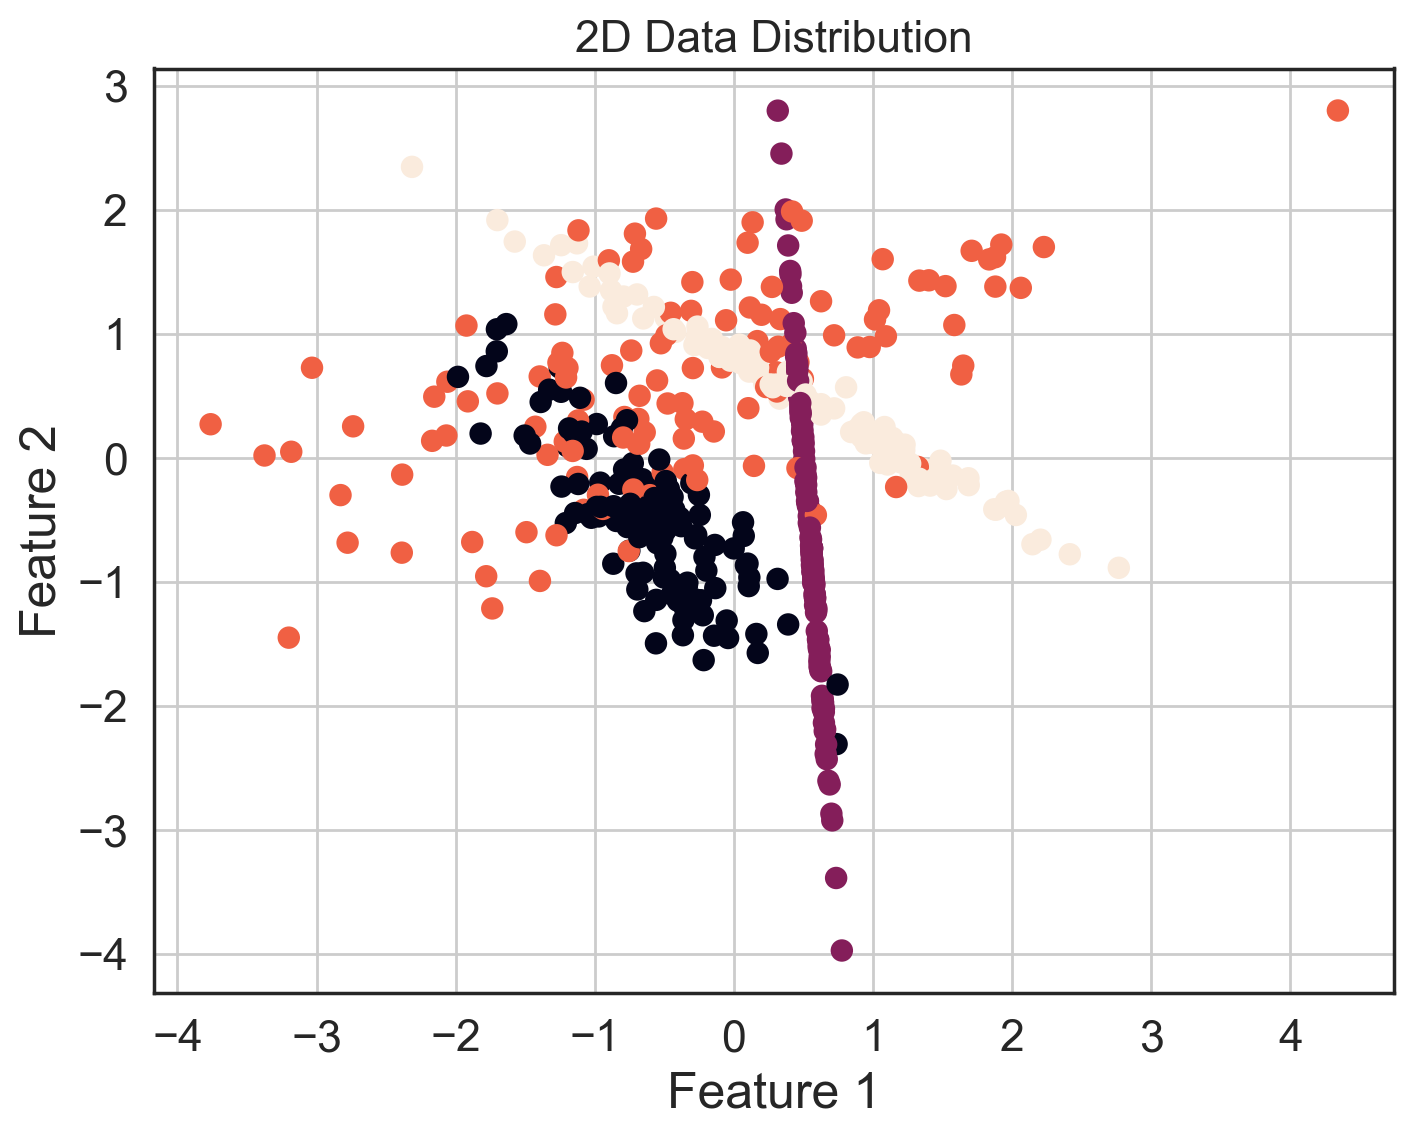

In [5]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

n_samples = 500
n_clusters = 4
#weights = np.array([1, 1, 0.7, 0.5] )
#weights /= weights.sum()
class_sep = 0.5
n_features = 2
X_dat, Y_dat = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_features,
    n_redundant=0,
    n_repeated=0,
    n_classes=n_clusters,
    n_clusters_per_class=1,
    flip_y=0.0,  # No noise initially
    class_sep=class_sep,
    hypercube=True,
    shuffle=True,
    weights=None,
    random_state=157)

X, X_test, Y, Y_test = train_test_split(X_dat, Y_dat, test_size=0.3, random_state=42)
print(X.shape, X_test.shape, Y.shape, Y_test.shape)
#X, Y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=2, center_box=(-20,20), random_state=150*kk)
#scaler = StandardScaler().fit(X)
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

X_dat = StandardScaler().fit_transform(X_dat)


# Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_dat[:, 0], X_dat[:, 1], c=Y_dat, s=50)
plt.title('2D Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [12]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Lambda, Compose
import numpy as np
from sklearn.model_selection import train_test_split

# Transformation pipeline
transform = Compose([ToTensor(), Lambda(lambda x: x.numpy())])

# Load MNIST data
mnist_train = MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = MNIST(root='./data', train=False, download=True, transform=transform)

# Convert to NumPy arrays
X_train_full = np.array([img for img, _ in mnist_train])
y_train_full = np.array([label for _, label in mnist_train])

X_test_full = np.array([img for img, _ in mnist_test])
y_test_full = np.array([label for _, label in mnist_test])

# Assuming you want to specify custom sizes for the training and test sets
desired_train_size = 500  # For example, 20,000 samples for training
desired_test_size = 1000  # For example, 4,000 samples for testing

# Split the full training dataset into a smaller training set and a discard set
X, _, Y, _ = train_test_split(X_train_full, y_train_full, train_size=desired_train_size, random_state=42)

# Similarly, split the full test dataset
X_test, _, Y_test, _ = train_test_split(X_test_full, y_test_full, train_size=desired_test_size, random_state=42)

# Normalize the data
#X = (X - 0.5) / 0.5
#X_test = (X_test - 0.5) / 0.5

print(X.shape, Y.shape, X_test.shape, Y_test.shape)

(500, 1, 28, 28) (500,) (1000, 1, 28, 28) (1000,)


0.0
2046
0.12
8922
0.24
25197
0.36
61763
0.48
2003530
0.6
2843027
(6, 6)
(6,)
(6,)


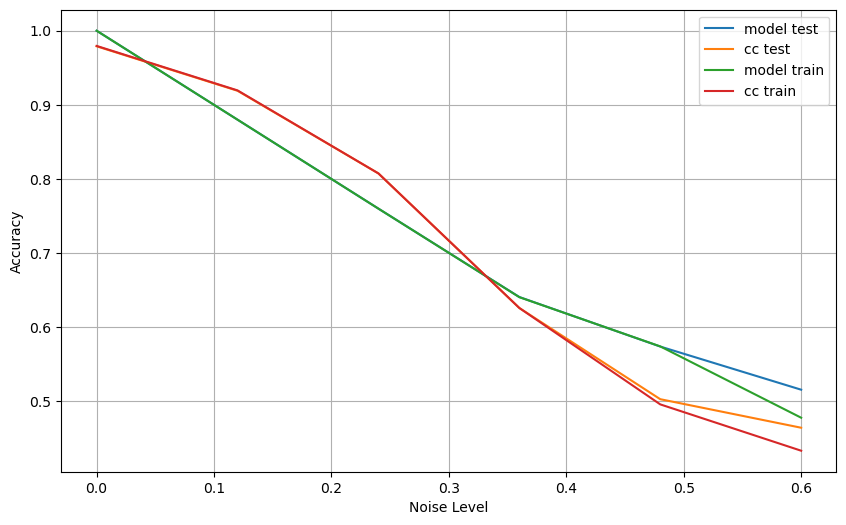

In [8]:
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import torch


def randomize_labels_with_classes(Y, classes, p):
    n = len(Y)
    num_to_change = int(n * p)  # Number of labels to change
    
    # Select random indices without replacement
    indices_to_change = np.random.choice(n, size=num_to_change, replace=False)
    
    for index in indices_to_change:
        current_label = Y[index]
        # Filter out the current label from the classes for the new label selection
        available_classes = np.array([cls for cls in classes if cls != current_label])
        # Choose a new label different from the current one
        new_label = np.random.choice(available_classes)
        Y[index] = new_label
    
    return Y

accuracies_model1_all = []
accuracies_model2_all = []
accuracies_model3_all = []
accuracies_model4_all = []
classes = np.unique(Y)
for kk in range(1):
    np.random.seed(13*kk)
    torch.manual_seed(13*kk)
    
    # Define gamma values
    gamma_values = np.linspace(0, 0.6, 6)

    # Model definitions
    #model1 = MLPClassifier(random_state=18*kk, max_iter=10, hidden_layer_sizes=(100, 100))
    #model1 = CustomNNClassifier(input_dim=n_features, output_dim=n_clusters, hidden_layers=[100, 100, 100], dropout_rate=0.5, lr=0.001, batch_size=64, epochs=50)
    model1 = CustomCNNClassifier(lr=0.001, momentum=0.9, batch_size=64, epochs=50, dropout_rate=0.0)

    # Assuming model2 is given and defined elsewhere
    # Placeholder for accuracies
    accuracies_model1 = []
    accuracies_model2 = []
    accuracies_model3 = []
    accuracies_model4 = []
    for gamma in gamma_values:
        print(gamma)
        # Introduce noise into labels
        Y_noisy = Y.copy()
        Y_noisy = randomize_labels_with_classes(Y_noisy, classes, gamma)
        
        # Train models on the noisy dataset
        #model1.fit(X, Y_noisy, compute_cc=False)
        model1.fit(X, Y_noisy)
        
        # Make predictions
        X_all = np.concatenate([X, X_test])
        Y_all = np.concatenate([Y_noisy, Y_test])
        n_train = len(Y_noisy)
        predictions_model1 = model1.predict(X_all, use_dropout=False)
        predictions_model2 = cc_pred(model1, X_all, Y_all, n_train=n_train, use_model=True, use_dropout=False)

        p1 = predictions_model1[:n_train]
        p2 = predictions_model1[n_train:]
        p3 = predictions_model2[:n_train]
        p4 = predictions_model2[n_train:]
        
        # Calculate and store accuracy
        accuracies_model1.append(accuracy_score(Y, p1))
        accuracies_model2.append(accuracy_score(Y_test, p2))
        accuracies_model3.append(accuracy_score(Y, p3))
        accuracies_model4.append(accuracy_score(Y_test, p4))
        accuracies_model1_all.append(accuracies_model1)
        accuracies_model2_all.append(accuracies_model2)
        accuracies_model3_all.append(accuracies_model3)
        accuracies_model4_all.append(accuracies_model4)

accuracies_model1_all = np.array(accuracies_model1_all)
accuracies_model2_all = np.array(accuracies_model2_all)
accuracies_model3_all = np.array(accuracies_model3_all)
accuracies_model4_all = np.array(accuracies_model4_all)
print(accuracies_model1_all.shape)

# Calculate means and standard deviations across N for each K
mean1 = np.mean(accuracies_model1_all, axis=0)
std1 = np.std(accuracies_model1_all, axis=0)

mean2 = np.mean(accuracies_model2_all, axis=0)
std2 = np.std(accuracies_model2_all, axis=0)

mean3 = np.mean(accuracies_model3_all, axis=0)
std3 = np.std(accuracies_model3_all, axis=0)

mean4 = np.mean(accuracies_model4_all, axis=0)
std4 = np.std(accuracies_model4_all, axis=0)
print(mean1.shape)
print(std1.shape)

# Plot mean lines
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, mean1, label='model test')
plt.plot(gamma_values, mean2, label='cc test')
plt.plot(gamma_values, mean3, label='model train')
plt.plot(gamma_values, mean4, label='cc train')
#plt.plot(gamma_values, mean3, label='cc vs model')

# Plot variance as a shaded area
plt.fill_between(gamma_values, mean1-std1, mean1+std1, alpha=0.2)
plt.fill_between(gamma_values, mean2-std2, mean2+std2, alpha=0.2)
plt.fill_between(gamma_values, mean3-std3, mean3+std3, alpha=0.2)
plt.fill_between(gamma_values, mean4-std4, mean4+std4, alpha=0.2)
#plt.fill_between(gamma_values, mean3-std3, mean3+std3, alpha=0.3)

#plt.plot(gamma_values, accuracies_model3, label='random')
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import torch

def randomize_labels_with_classes(Y, classes, p):
    n = len(Y)
    num_to_change = int(n * p)  # Number of labels to change
    
    # Select random indices without replacement
    indices_to_change = np.random.choice(n, size=num_to_change, replace=False)
    
    for index in indices_to_change:
        current_label = Y[index]
        # Filter out the current label from the classes for the new label selection
        available_classes = np.array([cls for cls in classes if cls != current_label])
        # Choose a new label different from the current one
        new_label = np.random.choice(available_classes)
        Y[index] = new_label
    
    return Y

accuracies_model1 = []
accuracies_model2 = []

loss_model1 = []
loss_model2 = []
classes = np.unique(Y)
for kk in range(3):
    print(kk)
    np.random.seed(13*kk)
    torch.manual_seed(13*kk)
    
    # Define gamma values
    #gamma_values = np.linspace(0, 1, 11)
    gamma = 0.6

    # Model definitions
    #model1 = MLPClassifier(random_state=18*kk, max_iter=10, hidden_layer_sizes=(100, 100))
    #model1 = CustomNNClassifier(input_dim=n_features, output_dim=n_clusters, hidden_layers=[100, 100], dropout_rate=0.0, lr=0.001, batch_size=64, epochs=250)
    model1 = CustomCNNClassifier(lr=0.001, momentum=0.9, batch_size=128, epochs=30, dropout_rate=0.0)
    Y_noisy = Y.copy()
    Y_noisy = randomize_labels_with_classes(Y_noisy, classes, gamma)
        
    # Train models on the noisy dataset
    model_loss, cc_loss, model_acc, cc_acc = model1.fit(X, Y_noisy, X_test, Y_test, Y_true=Y, compute_cc=True)
    
    # Calculate and store accuracy
    accuracies_model1.append(model_acc)
    accuracies_model2.append(cc_acc)

    loss_model1.append(model_loss)
    loss_model2.append(cc_loss)

accuracies_model1 = np.array(accuracies_model1)
accuracies_model2 = np.array(accuracies_model2)

loss_model1 = np.array(loss_model1)
loss_model2 = np.array(loss_model2)

# Calculate means and standard deviations across N for each K
mean_acc_model = np.mean(accuracies_model1, axis=0)
std_acc_model = np.std(accuracies_model1, axis=0)
mean_acc_cc = np.mean(accuracies_model2, axis=0)
std_acc_cc = np.std(accuracies_model2, axis=0)

mean_loss_model = np.mean(loss_model1, axis=0)
std_loss_model = np.std(loss_model1, axis=0)
mean_loss_cc = np.mean(loss_model2, axis=0)
std_loss_cc = np.std(loss_model2, axis=0)

0
291750
Epoch 0: Model test accuracy = 0.1930, CC test accuracy = 0.1100, Model accuracy = 0.1980, CC accuracy = 0.1320
179250
Epoch 2: Model test accuracy = 0.2630, CC test accuracy = 0.0930, Model accuracy = 0.2780, CC accuracy = 0.1380
134728
Epoch 4: Model test accuracy = 0.6480, CC test accuracy = 0.6470, Model accuracy = 0.6600, CC accuracy = 0.6760
135878
Epoch 6: Model test accuracy = 0.6680, CC test accuracy = 0.6790, Model accuracy = 0.6700, CC accuracy = 0.6700
134756
Epoch 8: Model test accuracy = 0.7020, CC test accuracy = 0.7000, Model accuracy = 0.7200, CC accuracy = 0.6920
111741
Epoch 10: Model test accuracy = 0.7370, CC test accuracy = 0.7420, Model accuracy = 0.7220, CC accuracy = 0.7260
111712
Epoch 12: Model test accuracy = 0.7090, CC test accuracy = 0.6670, Model accuracy = 0.6620, CC accuracy = 0.6480
110792
Epoch 14: Model test accuracy = 0.6990, CC test accuracy = 0.7220, Model accuracy = 0.6940, CC accuracy = 0.7040
110717
Epoch 16: Model test accuracy = 0.66

In [13]:
accuracies_model1

array([[[6, 6, 6, ..., 6, 6, 6],
        [3, 3, 3, ..., 6, 6, 6],
        [3, 3, 1, ..., 6, 6, 6],
        ...,
        [5, 9, 1, ..., 0, 0, 4],
        [5, 9, 1, ..., 0, 0, 4],
        [5, 9, 1, ..., 0, 0, 4]],

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 8, 1, ..., 6, 3, 6],
        [8, 8, 1, ..., 6, 6, 4],
        ...,
        [5, 9, 1, ..., 0, 2, 4],
        [5, 9, 1, ..., 0, 2, 4],
        [5, 9, 1, ..., 0, 2, 4]],

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 1, ..., 3, 3, 6],
        [3, 7, 1, ..., 0, 0, 6],
        ...,
        [5, 9, 1, ..., 0, 0, 4],
        [5, 9, 1, ..., 0, 0, 4],
        [5, 9, 1, ..., 0, 0, 4]]], dtype=int64)

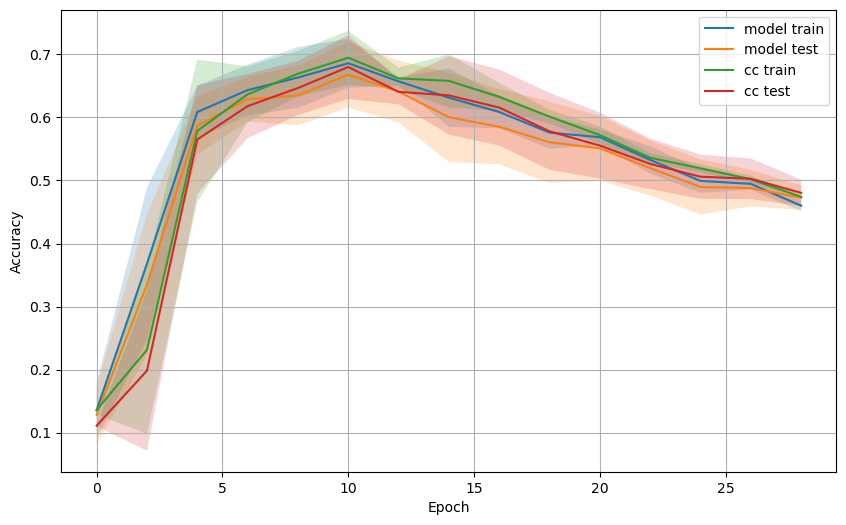

: 

In [16]:

# Plot mean lines
plt.figure(figsize=(10, 6))
plt.plot(2*np.arange(len(mean_acc_model)), mean_acc_model, label='model train')
plt.plot(2*np.arange(len(mean_loss_model)), mean_loss_model, label='model test')
plt.plot(2*np.arange(len(mean_acc_cc)), mean_acc_cc, label='cc train')
plt.plot(2*np.arange(len(mean_loss_cc)), mean_loss_cc, label='cc test')
#plt.plot(gamma_values, mean3, label='cc vs model')

# Plot variance as a shaded area
plt.fill_between(2*np.arange(len(mean_acc_model)), mean_acc_model-std_acc_model, mean_acc_model+std_acc_model, alpha=0.2)
plt.fill_between(2*np.arange(len(mean_loss_model)), mean_loss_model-std_loss_model, mean_loss_model+std_loss_model, alpha=0.2)
plt.fill_between(2*np.arange(len(mean_acc_cc)), mean_acc_cc-std_acc_cc, mean_acc_cc+std_acc_cc, alpha=0.2)
plt.fill_between(2*np.arange(len(mean_loss_cc)), mean_loss_cc-std_loss_cc, mean_loss_cc+std_loss_cc, alpha=0.2)
#plt.fill_between(gamma_values, mean3-std3, mean3+std3, alpha=0.3)

#plt.plot(gamma_values, accuracies_model3, label='random')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
import numpy as np
from rac.correlation_clustering import max_correlation, fast_max_correlation, max_correlation_dynamic_K, mean_field_clustering
from collections import Counter
from collections import defaultdict

def cc_pred(p, nl):
    N = len(p)
    S = np.zeros((N, N))

    # Initialize similarity matrix
    for i in range(N):
        for j in range(0, i):
            #S[i, j] = 1 if Y[i] == Y[j] else -1
            #S[j, i] = S[i, j]
            P_S_ij_plus_1 = np.sum(p[i, :] * p[j, :])
            E_S_ij_plus_1 = P_S_ij_plus_1
            E_S_ij_minus_1 = E_S_ij_plus_1 - 1
            E_S_ij = P_S_ij_plus_1 * E_S_ij_plus_1 + (1 - P_S_ij_plus_1) * E_S_ij_minus_1
            S[i, j] = E_S_ij
            S[j, i] = S[i, j]
            if np.random.rand() < nl:
                S[i, j] = np.random.uniform(-0.001, 0.001)
                S[j, i] = S[i, j]

    # Ensure diagonal is zero
    np.fill_diagonal(S, 0)

    n_classes = p.shape[1]
    clustering_solution, _ = fast_max_correlation(S, n_classes, 3)
    #clustering_solution, q, h = mean_field_clustering(
    #            S=S, K=n_classes, betas=[3], max_iter=150, tol=1e-10, 
    #            predicted_labels=clustering_solution
    #        )

    return clustering_solution

In [180]:
import numpy as np

# Adjust NumPy print options for clearer output
np.set_printoptions(precision=3, suppress=True)

# Example data setup
N, K = 10, 3  # Example: 5 data points, 3 classes
np.random.seed(42)  # For reproducible results

# Simulated softmax probabilities
p = np.random.rand(N, K)
p /= p.sum(axis=1, keepdims=True)

# Simulated queried_labels (correct_labels) and wrong_labels with possible conflicts
queried_labels = np.random.randint(0, 3, (N, K))
wrong_labels = np.random.randint(0, 3, (N, K))

# Initialize adjusted_prob with original probabilities
adjusted_prob = np.copy(p)

# Constants for exponent scaling
alpha = 1  # Scale factor for queried_labels
beta = 1   # Scale factor for wrong_labels

# Applying adjustments with a fixed base (e) and scaled exponents
for i in range(N):
    for j in range(K):
        exponent = alpha * queried_labels[i, j] - beta * wrong_labels[i, j]
        adjustment_factor = np.exp(exponent)
        
        adjusted_prob[i, j] *= adjustment_factor
    
    # Normalize to ensure the probabilities sum to 1
    adjusted_prob[i, :] /= np.sum(adjusted_prob[i, :])

# Output the adjusted probabilities with formatting
print("Original Probabilities:\n", p)
print("Queried (Correct) Labels:\n", queried_labels)
print("Wrong Labels:\n", wrong_labels)
print("Adjusted Probabilities:\n", adjusted_prob)


Original Probabilities:
 [[0.182 0.462 0.356]
 [0.657 0.171 0.171]
 [0.038 0.568 0.394]
 [0.417 0.012 0.571]
 [0.679 0.173 0.148]
 [0.181 0.301 0.518]
 [0.324 0.218 0.458]
 [0.175 0.366 0.459]
 [0.317 0.545 0.139]
 [0.446 0.514 0.04 ]]
Queried (Correct) Labels:
 [[2 2 0]
 [0 2 1]
 [0 1 1]
 [1 0 1]
 [0 1 2]
 [2 0 2]
 [2 1 0]
 [1 1 1]
 [1 1 1]
 [1 0 2]]
Wrong Labels:
 [[1 1 1]
 [1 1 1]
 [2 2 1]
 [2 0 1]
 [0 0 1]
 [2 0 1]
 [0 0 0]
 [0 2 0]
 [0 0 2]
 [0 0 2]]
Adjusted Probabilities:
 [[0.263 0.667 0.07 ]
 [0.275 0.53  0.195]
 [0.008 0.344 0.648]
 [0.208 0.016 0.775]
 [0.437 0.303 0.26 ]
 [0.096 0.159 0.745]
 [0.695 0.172 0.133]
 [0.256 0.072 0.672]
 [0.36  0.619 0.021]
 [0.686 0.291 0.023]]


In [261]:
import numpy as np

# Setup for a single data point with manually adjustable parameters
N, K = 1, 3  # 1 data point, 3 classes

# Manually set parameters
p = np.array([[1.0, 0.2, 1.2]])  # Example softmax probabilities for the single data point
p /= p.sum()  # Normalize to ensure the probabilities sum to 1
queried_labels = np.array([[1, 1, 0]])  # Manually set queried_labels
wrong_labels = np.array([[0, 0, 1]])  # Manually set wrong_labels

scaling_factor = 1  # Unified scale factor for adjustment sensitivity

# Applying adjustments with a single scaling factor
adjusted_prob = np.copy(p)
for i in range(N):
    for j in range(K):
        exponent = scaling_factor * (queried_labels[i, j] - wrong_labels[i, j])
        adjustment_factor = np.exp(exponent)
        
        adjusted_prob[i, j] *= adjustment_factor
    
    # Normalize to ensure the probabilities sum to 1
    adjusted_prob[i, :] /= np.sum(adjusted_prob[i, :])

p, queried_labels, wrong_labels, adjusted_prob

(array([[0.417, 0.083, 0.5  ]]),
 array([[1, 1, 0]]),
 array([[0, 0, 1]]),
 array([[0.734, 0.147, 0.119]]))

In [236]:
s1 = 1
s2 = 1
np.exp(s1 - s2)

1.0

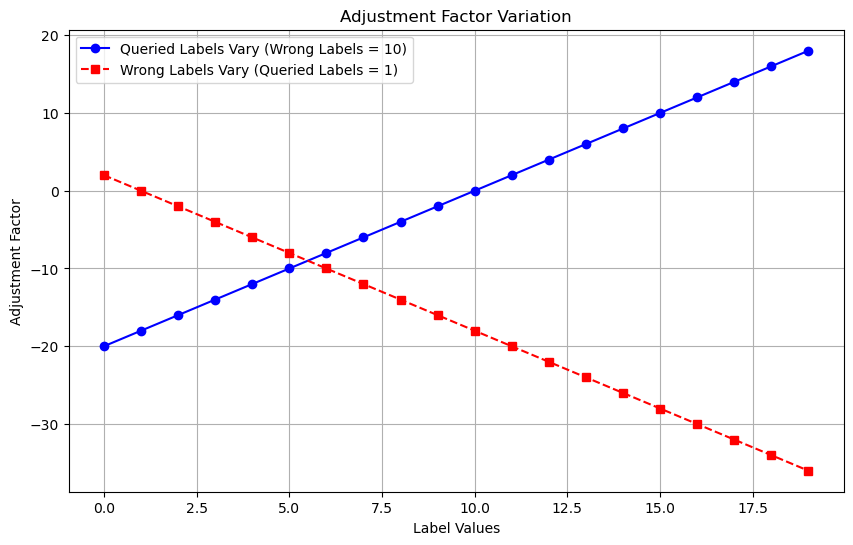

In [260]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the setup
scaling_factor = 2.0  # Unified scale factor for adjustment sensitivity
label_values = range(0, 20)  # Range of label values for demonstration

# Fixed label values for comparison
fixed_wrong_label_value = 10
fixed_queried_label_value = 1

# Calculate adjustment factors for varying queried_labels with fixed wrong_labels
adjustment_factors_1d = np.log(np.exp(scaling_factor * (np.array(label_values) - fixed_wrong_label_value)))

# Calculate adjustment factors for varying wrong_labels with fixed queried_labels
adjustment_factors_1d_queried_fixed = np.log(np.exp(scaling_factor * (fixed_queried_label_value - np.array(label_values))))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(label_values, adjustment_factors_1d, marker='o', linestyle='-', color='blue', label=f'Queried Labels Vary (Wrong Labels = {fixed_wrong_label_value})')
plt.plot(label_values, adjustment_factors_1d_queried_fixed, marker='s', linestyle='--', color='red', label=f'Wrong Labels Vary (Queried Labels = {fixed_queried_label_value})')
plt.xlabel('Label Values')
plt.ylabel('Adjustment Factor')
plt.title('Adjustment Factor Variation')
plt.legend()
plt.grid(True)
plt.show()
